In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline

In [94]:
data = pd.read_csv('../data/hmeq_clean.csv',index_col=0)
data_cat = pd.read_csv('../data/data_0.csv',index_col=0)
data_del_null = pd.read_csv('../data/hmeq_clean_del_null.csv',index_col=0)
data_del_debtinc = pd.read_csv('../data/hmeq_clean_del_debtinc.csv',index_col=0)
data_del_null_cat = pd.read_csv('../data/data_1.csv',index_col=0)
data_del_debtinc_cat = pd.read_csv('../data/data_2.csv',index_col=0)
data_norm = pd.read_csv('../data/hmeq_normalised_0.csv',index_col=0)
data_norm_cat = pd.read_csv('../data/hmeq_normalised_1.csv',index_col=0)
data_norm_del_null = pd.read_csv('../data/hmeq_normalised_2.csv',index_col=0)
data_norm_del_debtinc = pd.read_csv('../data/hmeq_normalised_3.csv',index_col=0)
data_norm_del_null_cat = pd.read_csv('../data/hmeq_normalised_4.csv',index_col=0)
data_norm_del_debtinc_cat = pd.read_csv('../data/hmeq_normalised_5.csv',index_col=0)

In [95]:
dfs = [data,data_cat,data_del_null,data_del_debtinc,data_del_null_cat,data_del_debtinc_cat,
      data_norm,data_norm_cat,data_norm_del_null,data_norm_del_debtinc,data_norm_del_null_cat,
      data_norm_del_debtinc_cat]

In [96]:
def how_many_clusters(df,n):
    #X = df.drop(columns=['BAD'])
    X = df
    print('We are trying the model with {n} clusters'.format(n=n))
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(X)
    df['LABELS'] = labels
    print(df.LABELS.value_counts())
    ct = pd.crosstab(df.BAD,[df["LABELS"]])
    display(ct)
    plt.figure()
    display(sns.heatmap(ct))
    return ct

Lets see what happens if there are 50% of BAD 0 and 50% of BAD 1, to choose 50% of BAD0 I am going to choose the most representative group using the clusters. 

I am testing the dataframe number 0
We are trying the model with 2 clusters
1    4908
0    1052
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,861,3910
1,191,998


I am testing the dataframe number 1
We are trying the model with 2 clusters
1    4908
0    1052
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,861,3910
1,191,998


I am testing the dataframe number 2
We are trying the model with 2 clusters
1    4161
0    1036
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,856,3368
1,180,793


I am testing the dataframe number 3
We are trying the model with 2 clusters
0    4161
1    1036
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,3368,856
1,793,180


I am testing the dataframe number 4
We are trying the model with 2 clusters
0    4161
1    1036
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,3368,856
1,793,180


I am testing the dataframe number 5
We are trying the model with 2 clusters
0    4161
1    1036
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,3368,856
1,793,180


I am testing the dataframe number 6
We are trying the model with 2 clusters
1    3872
0    2088
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,1708,3063
1,380,809


I am testing the dataframe number 7
We are trying the model with 2 clusters
1    3073
0    2887
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,2302,2469
1,585,604


I am testing the dataframe number 8
We are trying the model with 2 clusters
0    3048
1    2149
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,2075,2149
1,973,0


I am testing the dataframe number 9
We are trying the model with 2 clusters
0    2775
1    2422
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,1802,2422
1,973,0


I am testing the dataframe number 10
We are trying the model with 2 clusters
0    3229
1    1968
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,2729,1495
1,500,473


I am testing the dataframe number 11
We are trying the model with 2 clusters
0    3214
1    1983
Name: LABELS, dtype: int64


LABELS,0,1
BAD,,
0,2662,1562
1,552,421


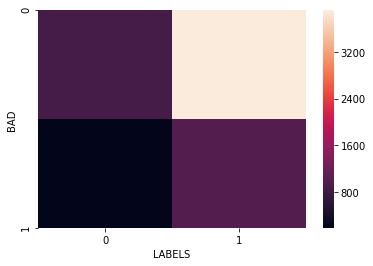

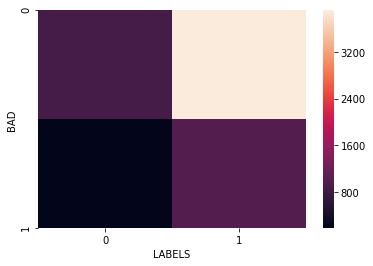

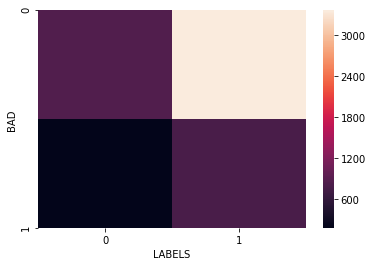

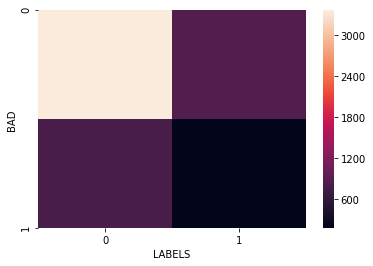

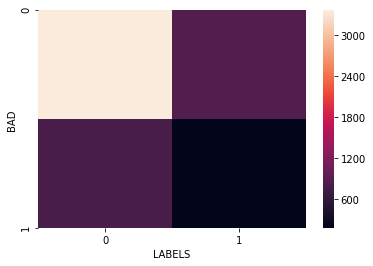

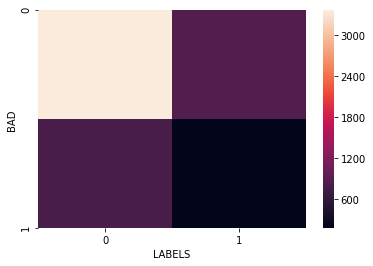

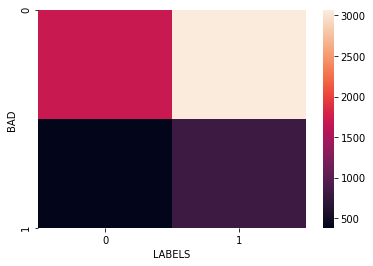

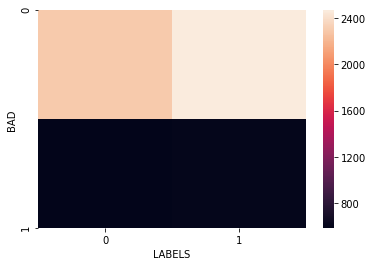

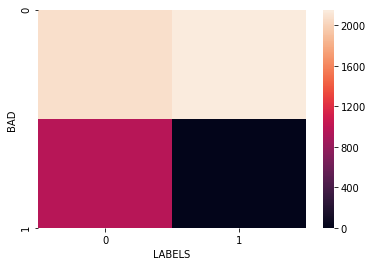

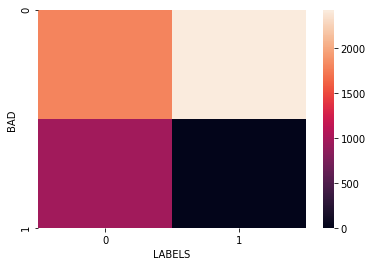

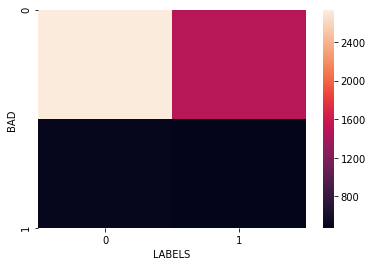

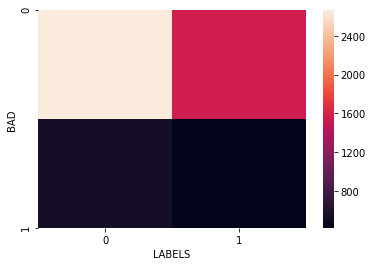

In [98]:
for n,df in enumerate(dfs):
    print("I am testing the dataframe number {n}".format(n=n))
    how_many_clusters(df,2)
    
#Cluster number 8,9 are the best

I am testing the dataframe number 0
We are trying the model with 4 clusters
1    2149
2    1298
0     973
3     777
Name: LABELS, dtype: int64


LABELS,0,1,2,3
BAD,,,,
0,0,2149,1298,777
1,973,0,0,0


I am testing the dataframe number 1
We are trying the model with 4 clusters
0    2422
1     993
2     973
3     809
Name: LABELS, dtype: int64


LABELS,0,1,2,3
BAD,,,,
0,2422,993,0,809
1,0,0,973,0


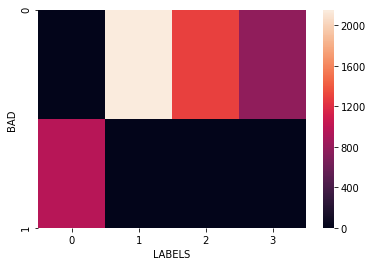

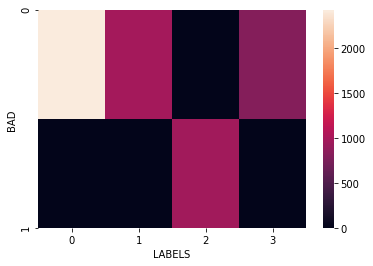

In [103]:
for n,df in enumerate(dfs[8:10]):
    print("I am testing the dataframe number {n}".format(n=n))
    how_many_clusters(df,4)